# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import probplot
from scipy.stats.mstats import zscore
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import statsmodels.api as sm

#sns.set_style("darkgrid")

df = pd.read_csv('data/human_body_temperature.csv')
df.shape

(130, 3)

<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>

1) Check if the distribution of the sample is normal. It's general knowledge that all human beings have about same body temperature. Temperature over certain mean value and beyond standard deviation would be extremely rare and it could be an outlier. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [4]:
temperatures = df['temperature']
stats.normaltest(temperatures)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The scipy.stats.normaltest of distribution returns a tuple: the first value is the chi-squared statistic and the second is the p-value. If the p-value is above a certain threshold; in this case 0.05, we can assume that the distribution of dataset is a normal distribution. The p-value is ~0.258 which is much greater than 0.05. Therefore, the temperatures is a normal distribution.

Generally histogram and a quantile-quantile plot are used to show normal distribution graphically.

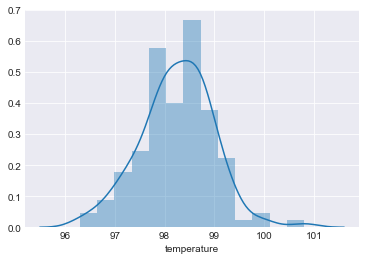

In [8]:
sns.distplot(temperatures)

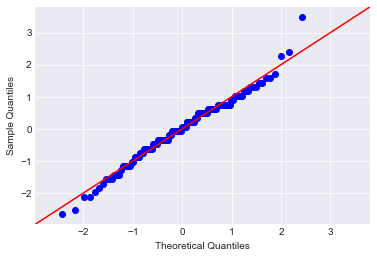

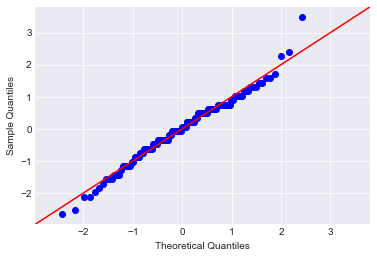

In [9]:
zscores = zscore(temperatures)
sm.qqplot(zscores, line='45')

### Conclusions
* The sampled distribution is normal
* Sample distribution is a good representative of the population

<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>

In [10]:
df.shape

(130, 3)

### Conclusions
* According to the Central Limit Theorem, we require at least 30 samples to satisfy the CLT conditions. Since our sample size is much larger than 30, we can safely say that the sample size is large enough. 
* Person's body temperature is independent of other person. The samples are statistically independent



<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

**Bootstrap hypothesis:**

* **Null Hypothesis:** The true population mean is 98.6 degrees F.
* **Alternate Hypothesis:** The true population mean is not 98.6 degrees F.

In [12]:
true_mean = 98.6
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
standard_error = stats.sem(df['temperature'], axis=None, ddof=0)
sample_mean, sample_std, standard_error

(98.24923076923078, 0.7331831580389454, 0.06405661469519337)

We have now obtained the values of the sample mean, the sample standard deviation and the sigma_x value.

The next step is to check how many standard deviations away is 98.6 (true mean) from 98.25 (sample mean).

In [15]:
z = (98.6 - sample_mean) / standard_error
z

5.475925202078115

In [16]:
p = (1-stats.norm.cdf(z))*2
p

4.352315174926957e-08

### Conclusions

* The p-value is extremely small. Therefore, we can **reject the null hypothesis**.
* We are comparing the sample mean to known value of population mean. Hence, the **one sample test** is more appropriate.
* The sample size is greater than 30. Hence, using the **z-statistic** is more appropriate.

You should do a two sample test when you are comparing two samples, each of which has variability that should be modeled. A one sample test would be if you are comparing the mean of a sample to some fixed value.

Let's calculate p value fro t-statistic

In [17]:
t = (98.6 - sample_mean) / standard_error
p = (1 - stats.t.cdf(t, len(df)-1))*2

2.1887464640713006e-07

In [24]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### Conclusions

* The p-value for the t-statistic is ten times larger than the p-value of the z-statisitc. 
* However, it is still extremely small. Therefore, we can safely reject the null hypothesis.
* All the conclusions arrived at with z-statistics also hold with the t-statistics.

<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [31]:
sample = df.sample(10)
sample

true_mean = 98.6
sample_mean = sample['temperature'].mean()
sample_std = sample['temperature'].std()
standard_error = sample_std/np.sqrt(len(sample))

print(sample_mean, sample_std, standard_error)

z = (98.6 - sample_mean) / standard_error
zp = (1-stats.norm.cdf(z))*2
print(zp)

t = z
tp = (1 - stats.t.cdf(t, len(df)-1))*2
tp

98.28 0.5613475849338914 0.17751369274259166
0.07143882453877404


0.07377341333566223

### Conclusions

* p-values obtained from random sample of 10 values for the z-statistic and t-statistic are considerably larger. 
* Therefore, we can not safely reject the null hypothesis.
* All the conclusions arrived at with z-statistics do not hold with sample of 10 statistics.

<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

Let us first calculate the true mean of human temperature with a confidence interval of 95%.

In [36]:
a = df['temperature']
stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(98.12200290560804, 98.37645863285351)

From the above results, we are 95% confident that the true mean is somewhere between 98.122F and 98.376F. The margin of error is 10%. Therefore, we can consider any temperature outside this range to be abnormal.

### Conclusion
A body temperature below 98.123 and above 98.375 should be considered abnormal.

<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

In [45]:
male_temps = df[df['gender'] == 'M']['temperature']
female_temps = df[df['gender'] == 'F']['temperature']

len(male_temps), len(female_temps)

(65, 65)

In [40]:
male_mean = male_temps.mean()
male_std = male_temps.std()

male_mean, male_std

(98.1046153846154, 0.6987557623265908)

In [41]:
female_mean = female_temps.mean()
female_std = female_temps.std()

female_mean, female_std

(98.39384615384613, 0.7434877527313665)

From the above calculations, it can be seen that the mean and the standard deviations of male and female temperatures differ slightly. The next step is to determine if this difference is a statistically significant one.

For hypothesis testing, the following are defined:

* **Null Hypothesis:** The true mean temperature for men and women are the same.
* **Alternate Hypothesis:** The true mean temperature for men and women are not the same.

The threshold value of $\alpha$ is assumed to be 0.05.
Assuming Null Hypothesis is true.

In [46]:
t2, p2 = stats.ttest_ind(male_temps,female_temps)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -2.2854345381656103
p = 0.04786376624479122


The p-value obtained in this case is 0.04 which is less than the accepted threshold of 0.05.

Therefore, we have to reject the null hypothesis and accept the alternate hypothesis. In other words, **there is a significant difference in male and female body temperatures.**

For this test, two-sample test was used as we were trying to compare the means of two different groups. 

## Summary

1. The distribution of human temperatures is normal and can be modeled as a Gaussian distribution.
2. The human temperatures are statistically independent.
3. We are reasonably confident that the mean temperature of the human body is not 98.6F. This is done by hypothesis testing and calculating the corresponding z-statistic.
4. With smaller random sample size results were contradicting with larger population.
4. The z-statistic and t-statsitic yield similar results for sample sizes greater than 30.
5. Male and female body temperatures differ significantly to be of statistical importance.